##### SAMPLE SUPER STORE ANALYSIS

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the sample super store excel file into a data frame called sales_data

In [12]:
sales_data = pd.read_excel('C:\\Users\\rajan\\Python Basics\\DataAnalysis\\Sample_Superstore.xls')

#### Check the head of the data frame

In [13]:
sales_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


####  Use the .info() to check how many columns are there in the data

In [14]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

### Data Cleaning

#### Check for missing values

In [16]:
sales_data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### Check for duplicates

In [18]:
sales_data.duplicated().sum()

0

### Exploratory Data analysis

#### Correlation Matrix

In [23]:
sales_data.corr()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

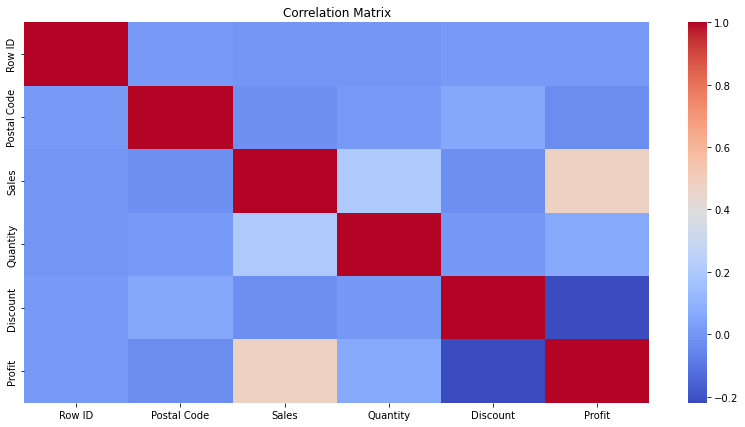

In [27]:
plt.figure(figsize=(14, 7))
sns.heatmap(sales_data.corr(),cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Pivot Table -- Monthly Sales by Year

In [36]:
pivot = sales_data.pivot_table(index=sales_data['Order Date'].dt.month, columns=sales_data['Order Date'].dt.year, values='Sales', aggfunc='sum')

In [30]:
pivot

Order Date,2014,2015,2016,2017
Order Date,,,,
1,14236.8950,18174.0756,18542.4910,43971.3740
2,4519.8920,11951.4110,22978.8150,20301.1334
3,55691.0090,38726.2520,51715.8750,58872.3528
4,28295.3450,34195.2085,38750.0390,36521.5361
5,23648.2870,30131.6865,56987.7280,44261.1102
6,34595.1276,24797.2920,40344.5340,52981.7257
7,33946.3930,28765.3250,39261.9630,45264.4160
8,27909.4685,36898.3322,31115.3743,63120.8880
9,81777.3508,64595.9180,73410.0249,87866.6520


#### Heatmap - Mothly Sales by Year

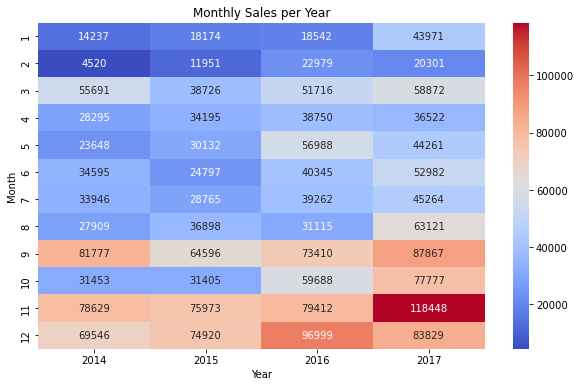

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Monthly Sales per Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()



#### Bar Plot --- Monthly sales by Year

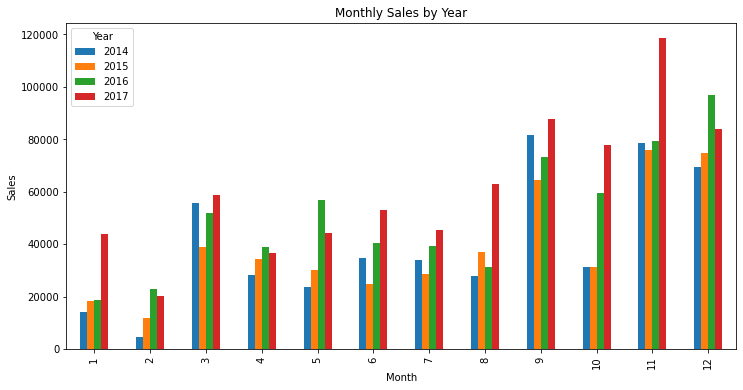

In [43]:
pivot.plot(kind='bar', figsize=(12,6))
plt.title('Monthly Sales by Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()

#### Scatter Plot ---  Sales vs Profit

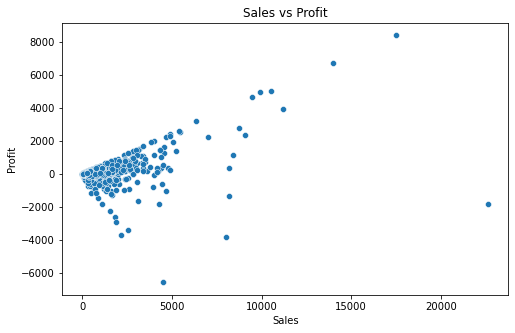

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Sales', y='Profit', data=sales_data)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

#### Analysis --- Sales By Region

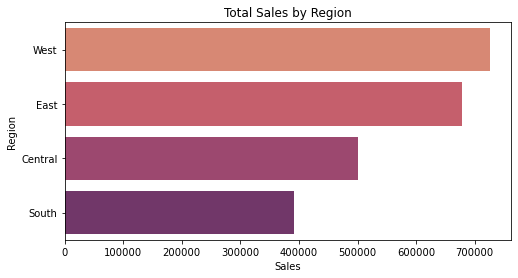

In [46]:
top_regions = sales_data.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=top_regions.values, y=top_regions.index, palette='flare')
plt.title('Total Sales by Region')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.show()

#### Analysis --- Sales by State

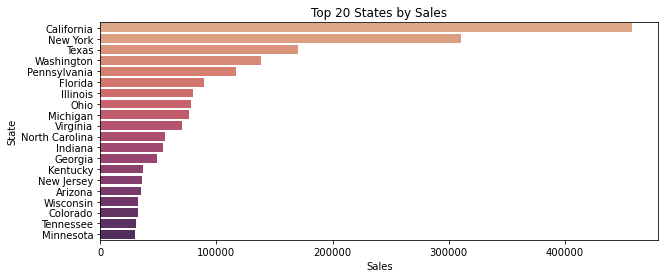

In [45]:
top_States_sales = sales_data.groupby('State')['Sales'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,4))
sns.barplot(x=top_States_sales.values, y=top_States_sales.index, palette='flare')
plt.title('Top 20 States by Sales')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()

#### Analysis --- Top 20 states by Profit

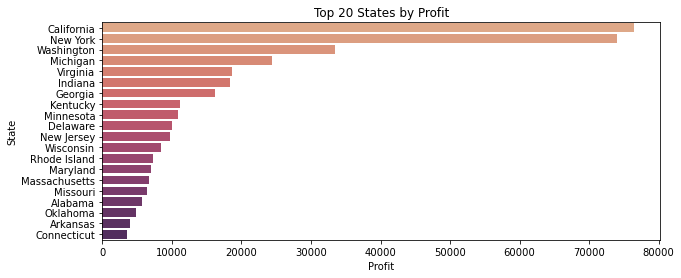

In [54]:
top_States_profit = sales_data.groupby('State')['Profit'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,4))
sns.barplot(x=top_States_profit.values, y=top_States_profit.index, palette='flare')
plt.title('Top 20 States by Profit')
plt.xlabel('Profit')
plt.ylabel('State')
plt.show()

#### Top 20 cities by Profit

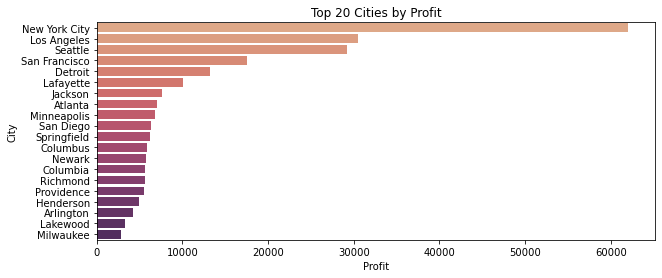

In [55]:
top_Cities_profit = sales_data.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,4))
sns.barplot(x=top_Cities_profit.values, y=top_Cities_profit.index, palette='flare')
plt.title('Top 20 Cities by Profit')
plt.xlabel('Profit')
plt.ylabel('City')
plt.show()

#### Category & Sub Category Analysis

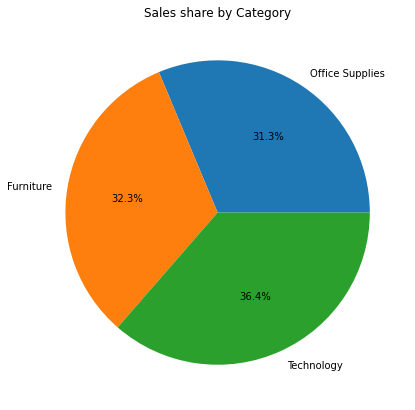

In [56]:
cat_sales = sales_data.groupby('Category')['Sales'].sum().sort_values()
plt.figure(figsize=(10,7))
cat_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales share by Category')
plt.ylabel('')
plt.show()

#### Analysis -- Profit by Category

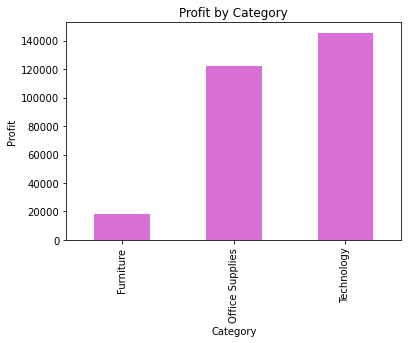

In [58]:
profit_by_category = sales_data.groupby('Category')['Profit'].sum().sort_values()
plt.figure(figsize=(6,4))
profit_by_category.plot(kind='bar', color='orchid', title='Profit by Category')
plt.xlabel('Category'); 
plt.ylabel('Profit'); 
plt.show()


#### Analysis --- Profit by Category and Region

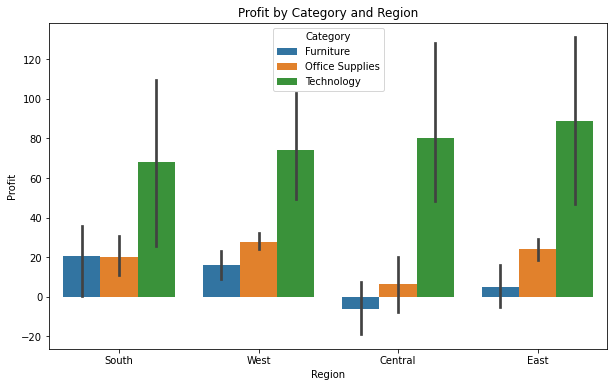

In [59]:
plt.figure(figsize=(10,6))
sns.barplot(data=sales_data, x='Region', y='Profit', hue='Category')
plt.title('Profit by Category and Region'); plt.show()

#### Discount impact on Profit

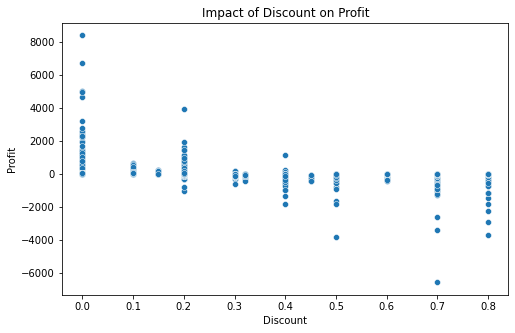

In [66]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=sales_data)
plt.title('Impact of Discount on Profit')
plt.show()

##### This visual shows that higher discounts correlates to lower profits.

#### Top 10 loss making sub-categories

In [68]:
loss_products = sales_data.groupby('Sub-Category')['Profit'].sum().sort_values().head(10)
print('Most Loss-Making Sub-Categories:')
loss_products

Most Loss-Making Sub-Categories:


Sub-Category
Tables        -17725.4811
Bookcases      -3472.5560
Supplies       -1189.0995
Fasteners        949.5182
Machines        3384.7569
Labels          5546.2540
Art             6527.7870
Envelopes       6964.1767
Furnishings    13059.1436
Appliances     18138.0054
Name: Profit, dtype: float64

#### Analysis Top customers by sales

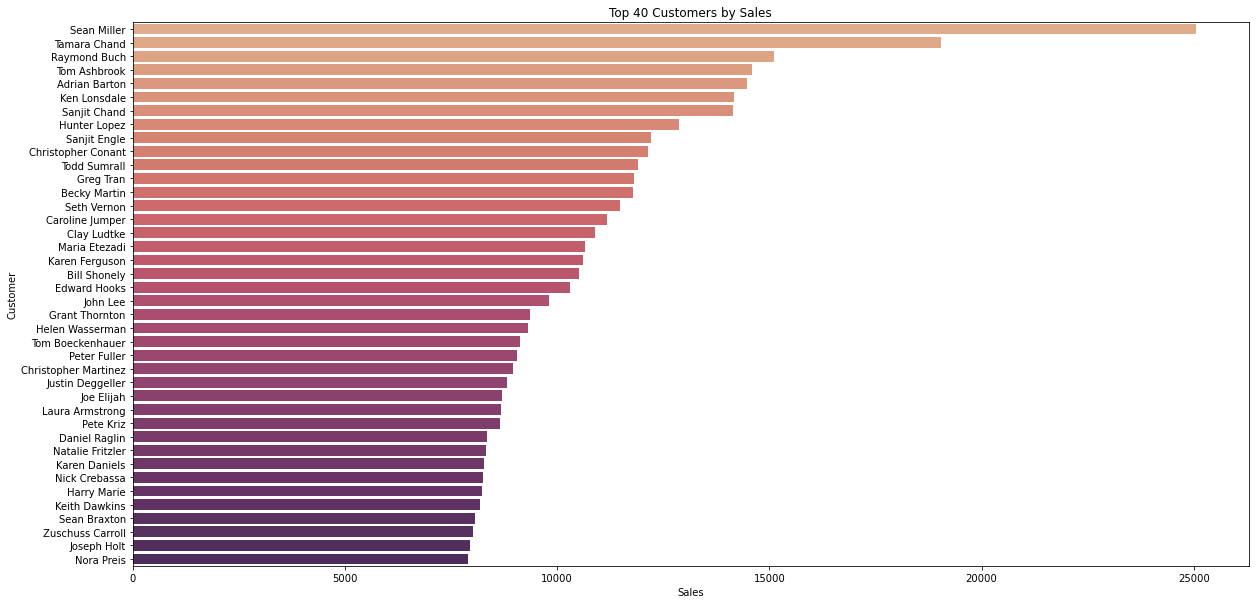

In [72]:
top_customers_sales = sales_data.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(40)
plt.figure(figsize=(20,10))
sns.barplot(x=top_customers_sales.values, y=top_customers_sales.index, palette="flare")
plt.title('Top 40 Customers by Sales')
plt.xlabel('Sales')
plt.ylabel('Customer')
plt.show()

#### Analysis Top customers by Profit

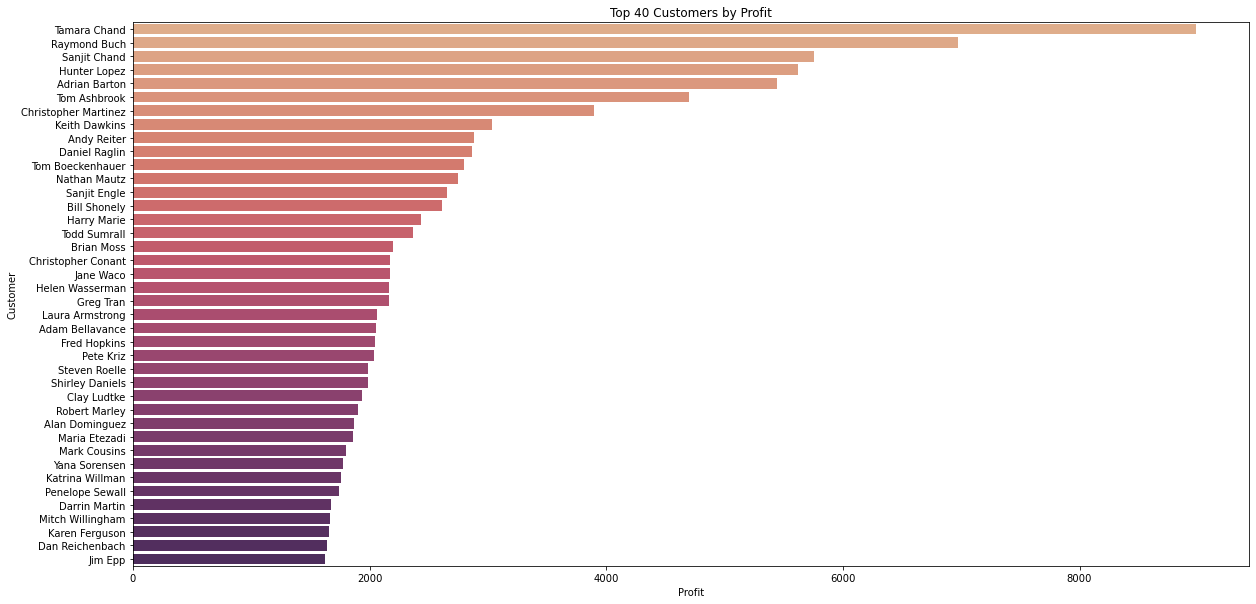

In [73]:
top_customers_profit = sales_data.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(40)
plt.figure(figsize=(20,10))
sns.barplot(x=top_customers_profit .values, y=top_customers_profit .index , palette='flare')
plt.title('Top 40 Customers by Profit')
plt.xlabel('Profit')
plt.ylabel('Customer')
plt.show()